<a href="https://colab.research.google.com/github/Natasha-29/--3-./blob/master/%D0%A8%D0%B0%D1%84%D0%BE%D1%80%D0%BE%D1%81%D1%82%22%D0%9F%D0%A0%D0%9E%D0%93_6_%D0%9B%D0%A0_%D0%97%D0%B0%D1%89%D0%B8%D1%82%D0%B0_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Лабораторная работа 1 - 2***


---





Реализовать содержимое функций, декларированных в репле: https://replit.com/@zhukov/ClassicIntelligentEvaluations

мой репл: https://replit.com/@Nataliya29/ClassicIntelligentEvaluations#main.py

Сначала сделала fork репла с заданиями и  добавила туда следующее: 

1. **main.py** - вывод результатов по файлу 'MarketingSpend.csv', функции *count_different_values* и *get_total_quantity* (с демонстрацией работы)

2. **mathstats.py** - расчет максимумов, минимумов, дисперсии и сигмы.

In [ ]:
# пакет для аннотации типов
from typing import List 

## main.py

In [ ]:
    # Создаем множество и добавляем туда по очереди все встреченные элементы. 
    # Поскольку это множество, инвойсы в нем не будут повторяться
    # В конце считаем сколько элементов получилось
    # (сколько всего заказов)
def count_invoice(data: List[dict]) -> int:
    invoices = {d['InvoiceNo'] for d in data} 
    return len(invoices)

In [ ]:
    # кол-во различных значений
    # реализованно аналогично, через множество + проверка ключа на корректность

def count_different_values(data: List[dict], key: str) -> int:
    """
    Функция должна возвращать число различных значений для столбца key в списке data

    key - InvoiceNo или InvoiceDate или StockCode
    """
    if key not in ('InvoiceNo', 'InvoiceDate', 'StockCode'):
        raise ValueError('incorrect key name')
        
    values = {d[key] for d in data}
    return len(values)

In [ ]:
    # реализованно через генератор списка
    # если код совпадает с аргументом, то запишем кол-во в список
    # в конце найдем сумму элементов списка
    
def get_total_quantity(data: List[dict], stock_code: int) -> int:
    """
    Возвращает общее количество проданного товара для данного stock_code
    """
    quantities = [int(d['Quantity']) for d in data if int(d['StockCode']) == stock_code]
    return sum(quantities)

## mathstats.py

In [ ]:
class MathStats():
    def __init__(self, file):
        import csv

        self._file = file
        self._data = []
        self._mean = None
        self._disp = None
        
        with open(self._file, newline='') as csvfile:
            reader = csv.DictReader(csvfile)

            for _r in reader:
                row = {
                    'Date': _r[''],
                    'Offline': float(_r['Offline Spend']),
                    'Online': float(_r['Online Spend']),
                }
                self._data.append(row)

        # генерируем список значений офлайн и онлайн продаж за весь период
        offline_values = [d['Offline'] for d in self._data]
        online_values = [d['Online'] for d in self._data]

        # находим минимум и максимум по офлайн и онлайн продажам
        self._max = (max(offline_values), max(online_values))
        self._min = (min(offline_values), min(online_values))

    @property
    def data(self):
        return self._data

    def get_mean(self, data):
        """
        Вычисление среднего по оффлайн и онлайн тратам
        """

        sums = {'offline': 0, 'online': 0}
        for _l in data:
            sums['offline'] += _l['Offline']
            sums['online'] += _l['Online']

        self._mean = (sums['offline'] / len(data), sums['online'] / len(data))

        return self._mean

    @property
    def max(self):
        return self._max

    @property
    def min(self):
        return self._min

    @property
    def disp(self):
        offline_mean, online_mean = self.get_mean(self._data) #вычислила среднее значение
        offline_mean_sum, online_mean_sum = 0, 0
        for _l in self._data:
            _, offline_val, online_val = _l.values()
            offline_mean_sum += (offline_val - offline_mean) ** 2
            online_mean_sum += (online_val - online_mean) ** 2
        self._disp = (offline_mean_sum / len(self._data), online_mean_sum / len(self._data))
        return self._disp

    # по аналогии — со среднем квадратичным отклонением
    @property
    def sigma_sq(self):
        self._sigma_sq = (self._disp[0] ** (1/2), self._disp[1] ** (1/2))
        return self._sigma_sq


 ***Лабораторная работа 3 - 4***

---



Используя обучающий набор данных о пассажирах Титаника, найдите ответы на следующие вопросы: 

Для вычисления 3, 4, 5, 6, 7, 8 используйте тип данных float с точностью два знака в дробной части. 

In [ ]:
import pandas as pd  # импортирование библиотеки для считывания данных
from numpy import isnan  # импортирование функции isnan для проверки на "not a number"

# считаем данных из файла, в качестве столбца индексов используем PassengerId
data = pd.read_csv('train.csv', index_col="PassengerId")

###### 1. Какое количество мужчин и женщин ехало на параходе? Приведите два числа через пробел.

In [ ]:
def get_sex_distrib(data):

    n_male, n_female = data['Sex'].value_counts() # функция считает количество различных уникальных значений в серии
    return f"{n_male} {n_female}" # форматированный вывод результатов


In [ ]:
get_sex_distrib(data) 

'577 314'

###### 2.Подсчитайте сколько пассажиров загрузилось на борт в различных портах? Приведите три числа через пробел.

In [ ]:
def get_port_distrib(data):

    port_S, port_C, port_Q = data['Embarked'].value_counts() # функция считает количество различных уникальных значений в серии
    return f"{port_S} {port_C} {port_Q}" # форматированный вывод результатов


In [ ]:
get_port_distrib(data)

'644 168 77'

###### 3.Посчитайте долю (процент) погибших на параходе (число и процент)?


In [ ]:
def get_surv_percent(data):

    # получение количества уникальных элементов с помощью уже известной нам функции
    # нужные нам данные (кол-во умерших) находятся под индексом 0
    n_died = data['Survived'].value_counts()[0]

    # параметр normalize позволяет возвращать относительные частоты уникальных значений
    # normalize = True процентное соотношение
    # то есть он берет отношение интересующих нас значений к общему кол-ву значений
    # это значение нужно умножить на 100, чтобы получить проценты
    perc_died = data['Survived'].value_counts(normalize=True)[0] * 100

    return f"{n_died} {perc_died:.2f}%" # форматированный вывод с точностью до 2 знаков после запятой


In [ ]:
get_surv_percent(data)

'549 61.62%'

###### 4.Какие доли составляли пассажиры первого, второго, третьего класса?

In [ ]:
def get_class_distrib(data):
    """
    4. Какие доли составляли пассажиры первого, второго, третьего класса?    
    """
    # параметр normalize позволяет возвращать относительные частоты уникальных значений
    # каждое из этих значений умножаем на 100 для получения процентов
    n_pas_f_cl, n_pas_s_cl, n_pas_t_cl = data['Pclass'].value_counts(normalize=True) * 100 

    return f"{n_pas_f_cl:.2f}, {n_pas_s_cl:.2f}, {n_pas_t_cl:.2f}" # форматированный вывод с точностью до 2 знаков после запятой


In [ ]:
get_class_distrib(data)

'55.11, 24.24, 20.65'

###### 5.Вычислите коэффициент корреляции Пирсона между количеством супругов (SibSp) и количеством детей (Parch).

Коэффициент корреляции показывает тесноту линейной взаимосвязи и изменяется в диапазоне от -1 до 1. -1 (минус один) означает полную (функциональную) линейную обратную взаимосвязь. 1 (один) – полную (функциональную) линейную положительную взаимосвязь. 0 – отсутствие линейной корреляции (но не обязательно взаимосвязи)

In [ ]:
def find_corr_sibsp_parch(data):
    
    # пустые списки для значений параметров SibSp и Parch
    sibsp = []
    parch = []

    i = 0  # счётчик для цикла
    while i < len(data): # цикл будет выполняться, пока счётчик меньше длины наших данных
        
        # data.iloc - Позволяет нам выбрать конкретную ячейку набора данных
        if not(isnan(data.iloc[i]['SibSp'])): # проверка на NaN параметра SibSp
            sibsp.append(data.iloc[i]['SibSp']) # добавление значения SibSp в список
            parch.append(data.iloc[i]['Parch']) # добавление значения Parch в список
        i += 1

    # преобразование полученных списков в серии, чтобы можно было провести нужные вычисления
    sibsp, parch = pd.Series(sibsp), pd.Series(parch) 

    # вычисление корреляции
    corr_val = sibsp.corr(parch)
    return f"{corr_val:.2f}"

In [ ]:
find_corr_sibsp_parch(data)

'0.41'

###### 6.Выясните есть ли корреляция (вычислите коэффициент корреляции Пирсона) между:

1) возрастом и параметром Survived; 

In [ ]:
def find_corr_age_survival(data):
    
    # аналогично функции выше, разница в параметрах - Age и Survived
    age = []
    surv = []
    i = 0
    while i < len(data):

        if not(isnan(data.iloc[i]['Age'])):
            age.append(data.iloc[i]['Age'])
            surv.append(data.iloc[i]['Survived'])
        i += 1
# преобразование полученных списков в серии, чтобы можно было провести нужные вычисления
    age, surv = pd.Series(age), pd.Series(surv)
# вычисление корреляции
    corr_val = age.corr(surv)
    return f"{corr_val:.2f}"

In [ ]:
find_corr_age_survival(data)

'-0.08'

2) полом человека и параметром Survived;

In [ ]:
def find_corr_sex_survival(data):
    
    # аналогично функции выше, разница в параметрах - Sex и Survived
    sex = []
    surv = []
    i = 0
    while i < len(data):

        if not(isnan(data.iloc[i]['Survived'])):

            # для вычисления корреляции нужны числовые значения
            # поэтому с помощью условий преобразуем male в числа 0, а female - в 1
            if data.iloc[i]['Sex'] == "male":
                sex.append(0)
            else:
                sex.append(1)

            surv.append(data.iloc[i]['Survived'])
        i += 1

    sex, surv = pd.Series(sex), pd.Series(surv)

    corr_val = sex.corr(surv)
    return f"{corr_val:.2f}"


In [ ]:
find_corr_sex_survival(data)

'0.54'

 3) классом, в котором пассажир ехал, и параметром Survived.

In [ ]:
def find_corr_class_survival(data):
   
    # аналогично функции выше, разница в параметрах - Pclass и Survived
    pclass = []
    surv = []
    i = 0
    while i < len(data):

        if not(isnan(data.iloc[i]['Pclass'])):
            pclass.append(data.iloc[i]['Pclass'])
            surv.append(data.iloc[i]['Survived'])
        i += 1

    pclass, surv = pd.Series(pclass), pd.Series(surv)

    corr_val = pclass.corr(surv)
    return f"{corr_val:.2f}"

In [ ]:
find_corr_class_survival(data)

'-0.34'

###### 7.Посчитайте средний возраст пассажиров и медиану.

In [ ]:
def find_pass_mean_median(data):
    
    # функция mean считает среднее значение, а функция median - медиану
    mean_age, median = data['Age'].mean(), data['Age'].median()
    return f"{mean_age:.2f}, {median:.2f}"

In [ ]:
find_pass_mean_median(data)

'29.70, 28.00'

######  8.Посчитайте среднюю цену за билет и медиану.

In [ ]:
def find_ticket_mean_median(data):
   
    # функция mean считает среднее значение, а функция median - медиану
    mean_price, median = data['Fare'].mean(), data['Fare'].median()
    return f"{mean_price:.2f}, {median:.2f}"

In [ ]:
find_ticket_mean_median(data)

'32.20, 14.45'

###### 9.Какое самое популярное мужское имя на корабле?

In [ ]:
def find_popular_name(data):
    
    names = [] # пустой список для имён

    # проходимся по данным
    for i in data.iloc:
        if i['Sex'] == "male": # нам нужны только мужские имена

            # обращаемся к имени
            # partition делит строку на 3 части - то, что стоит до шаблона, сам шаблон и то, что после шаблона
            # нам нужно  после слов Mr. и Master. 
            name = i['Name'].partition('. ')[2] 
            names.append(name) # добавляем обрезанное имя в список

    # находим наиболее встречающееся имя в списке
    # аргумент key нужен для упорядочивания, в данном случае оно поможет найти именно наиболее встречающееся имя
    # set - множество, где хранятся уникальные значения
    result = max(set(names), key = names.count) 
    return f"{result}"

In [ ]:
find_popular_name(data)

'John'

###### 10.Какие самые популярные мужское и женские имена людей, старше 15 лет на корабле?

In [ ]:
def find_popular_adult_names(data):
    
    # пустые списки для хранения имён
    male = []
    female = []

    for i in data.iloc:

        # выбираем имена по мужскому полу и возрасту
        if i['Age'] > 15 and i['Sex'] == 'male':
            # метод partition - аналогично выше
            # split - разбиваем строку на список
            name = i['Name'].partition('. ')[2].split(' ')
            male.append(name[0]) # берём первую строку из списка - там содержится имя

        # выбираем имена по женскому полу и возрасту
        elif i['Age'] > 15 and i['Sex'] == 'female':
            
            # женские имена могут быть заключены в скобки - поэтому нужно изъять их оттуда
            if '(' in i['Name']:
                # разделяем имя на 3 части, берём то, что после скобки и обрезаем закрывающую скобку
                name = i['Name'].partition('(')[2].rstrip(')').split(' ')
            
            # на случай, если имена не заключены в скобки
            else:
                name = i['Name'].partition('. ')[2].split(' ')
            
            female.append(name[0])

    # нахождение наиболее частых - аналогично выше
    popular_male_name = max(set(male), key = male.count)
    popular_female_name = max(set(female), key = female.count)
    
    return f"{popular_male_name}, {popular_female_name}"

In [ ]:
find_popular_adult_names(data)

'William, Anna'

### Часть 2. 

Для набора данных из лабораторной работы 1 посчитать средние значения, 
медианы, максимальные и минимальные значения для столбцов Offline Spend, Online Spend.

In [ ]:
mark_spend = pd.read_csv('MarketingSpend.csv')

In [ ]:
def find_offline_mean_median(data):
    mean, median = data['Offline Spend'].mean(), data['Offline Spend'].median()
    return f"{mean:.2f}, {median:.2f}"


def find_online_mean_median(data):
    mean, median = data['Online Spend'].mean(), data['Online Spend'].median()
    return f"{mean:.2f}, {median:.2f}"


# функция max считает максимальное значение, а функция min - минимальное
def find_offline_max_min(data):
    max, min = data['Offline Spend'].max(), data['Offline Spend'].min()
    return f"{max}, {min}"


def find_online_max_min(data):
    max, min = data['Online Spend'].max(), data['Online Spend'].min()
    return f"{max}, {min}"

In [ ]:
print("Offline: среднее и медиана", find_offline_mean_median(mark_spend))
print("Online: среднее и медиана", find_online_mean_median(mark_spend))
print("Offline: максимальное и минимальное",
find_offline_max_min(mark_spend))
print("Online: максимальное и минимальное",
find_online_max_min(mark_spend))

Offline: среднее и медиана 2843.56, 3000.00
Online: среднее и медиана 1905.88, 1881.94
Offline: максимальное и минимальное 5000, 500
Online: максимальное и минимальное 4556.93, 320.25


# Лабораторная работа 5

Решение задачи регрессии.

Есть файл web_traffic.tsv, который представляет статистику посещений веб-сервера компании и нашей задачей является предсказание значения посещения, для того, чтобы выделить в нужный момент времени дополнительную мощность сервера и не допустить его перегрузки.

Слева находится индекс или номер часа по порядку, в который производился замер посещаемости, а справа - количество запросов сайта за этот час.

## Введение

In [ ]:
import pandas as pd
import scipy as sp
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline 

# построение графиков внутри текущего ноутбука

In [ ]:
# delimiter - сепаратор/разделитель
# names - cписок имен столбцов для использования

data = pd.read_csv('web_traffic.tsv',delimiter='\t',names=["hour", "requests"])

data = data.dropna() # dropna() - удаляет значения NaN

hours_data = data['hour']
requests_data = data['requests']

requests_data.head() # функция возвращает первые n строк для объекта
# нет строки с номером 1, потому что она содержит NaN и была удалена ранее

0    2272.0
2    1386.0
3    1365.0
4    1488.0
5    1337.0
Name: requests, dtype: float64

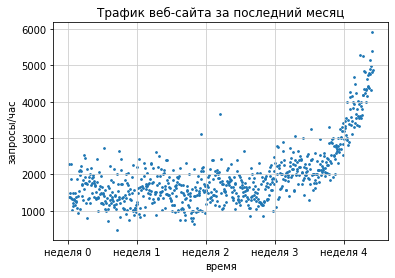

In [ ]:
plt.scatter(hours_data, requests_data, s=3) # s - размер точек
plt.title('Трафик веб-сайта за последний месяц')

plt.xlabel('время')
plt.ylabel('запросы/час')

plt.xticks([w*24*7 for w in range(10)],["неделя %i" %w for w in range(10)])
plt.autoscale(tight=False)

plt.grid(True, linestyle='-', color='0.8') #сетка
plt.show()

In [ ]:
# выч среднеквадратическое отклонение
def error(f,x,y):
    return np.sum((f(x)-y)**2) 

In [ ]:
# polyfit - метод, который помещает данные в полиномиальную функцию
# создается модель
f1p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 1, full=True)
print("Параметры модели {}".format(f1p))

Параметры модели [  2.59619213 989.02487106]


In [ ]:
f1 = np.poly1d(f1p) # одномерный полином
print(f"{error(f1, hours_data, requests_data):.5}")

3.1739e+08


Модель будет выглядеть следующим образом:
```
    f(x) = 2.59619213 * x + 989.02487106
```
MSE = 3.1739e+08

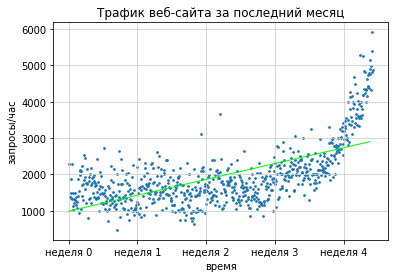

In [ ]:
plt.title('Трафик веб-сайта за последний месяц')
plt.xlabel('время')
plt.ylabel('запросы/час')
plt.xticks([w*7*24 for w in range(10)],["неделя %i" %w for w in range(10)])
plt.autoscale(tight=False)
plt.grid(True, linestyle='-', color='0.8')

# визуализация данных
plt.scatter(hours_data, requests_data, s=3)

# отобразим модель #1 
f1x = np.linspace(0, hours_data[len(hours_data)], len(hours_data)) # Возвращает равномерно распределенные числа через указанный интервал
f1y = f1(f1x)
plt.plot(f1x, f1y, linewidth=1.0, color='lime')

plt.show()

## С/р



1. Реализовать модели степени полинома 2, 3, 5, 10, 20
2. Посчитать для каждой из них метрику ошибки MSE и дать характеристику того, что получилось.

In [ ]:
# создание моделей степени полинома 2, 3, ... 20
f2p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 2, full=True)
f2 = np.poly1d(f2p)
print("Параметры модели 2 (степень полинома 2) {}".format(f2p))
print(f"MSE = {error(f2, hours_data, requests_data):.5}")



Параметры модели 2 (степень полинома 2) [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
MSE = 1.7998e+08


In [ ]:
f3p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 3, full=True)
f3 = np.poly1d(f3p)
print("Параметры модели 3 (степень полинома 3) {}".format(f3p))
print(f"MSE = {error(f3, hours_data, requests_data):.5}")



Параметры модели 3 (степень полинома 3) [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
MSE = 1.3935e+08


In [ ]:
f5p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 5, full=True)
f5 = np.poly1d(f5p)
print("Параметры модели 5 (степень полинома 5) {}".format(f5p))
print(f"MSE = {error(f5, hours_data, requests_data):.5}")



Параметры модели 5 (степень полинома 5) [ 2.16470951e-10 -3.13405153e-07  1.63844797e-04 -3.41497485e-02
  2.24785575e+00  1.53616050e+03]
MSE = 1.2446e+08


In [ ]:
f10p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 10, full=True)
f10 = np.poly1d(f10p)
print("Параметры модели 10 (степень полинома 10) {}".format(f10p))
print(f"MSE = {error(f10, hours_data, requests_data):.5}")


Параметры модели 10 (степень полинома 10) [-3.73981968e-22  1.36473756e-18 -2.14294406e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604588e-05  1.19167041e-02
 -9.41618606e-01  3.33703840e+01  1.26421204e+03]
MSE = 1.2194e+08


In [ ]:

f20p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 20, full=True)
f20 = np.poly1d(f20p)
print("Параметры модели 20 (степень полинома 20) {}".format(f20p))
print(f"MSE = {error(f20, hours_data, requests_data):.5}")

Параметры модели 20 (степень полинома 20) [ 4.83090666e-47 -3.18254288e-43  8.87216773e-40 -1.31484635e-36
  9.87793047e-34 -8.55503070e-32 -5.09644269e-28  3.80311873e-25
  4.98732305e-23 -2.74831025e-19  2.35473549e-16 -1.17298303e-13
  3.93132320e-11 -9.23453278e-09  1.52942330e-06 -1.76098283e-04
  1.36396780e-02 -6.69561733e-01  1.86541701e+01 -2.35174285e+02
  2.33820200e+03]
MSE = 1.1053e+08


3. Визуализировать каждую модель на графике так, чтобы это было отображено на одной координатной плоскости.

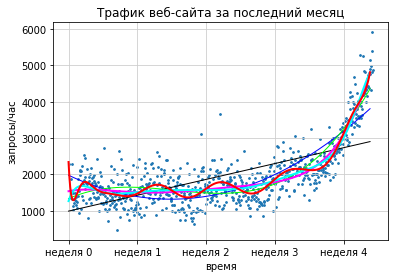

In [ ]:
plt.title('Трафик веб-сайта за последний месяц')
plt.xlabel('время')
plt.ylabel('запросы/час')
plt.xticks([w*7*24 for w in range(10)],["неделя %i" %w for w in range(10)])
plt.autoscale(tight=False)
plt.grid(True, linestyle='-', color='0.8')

# визуализация данных
plt.scatter(hours_data, requests_data, s=3)

# отобразим модель #1 (степень полинома 1)
fx = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f1y = f1(fx)
plt.plot(fx, f1y, linewidth=1.0, color='black')

# отобразим модель #2 (степень полинома 2)
f2y = f2(fx)
plt.plot(fx, f2y, linewidth=1.0, color='blue')

# отобразим модель #3 (степень полинома 3)
f3y = f3(fx)
plt.plot(fx, f3y, linewidth=1.0, color='lime')

# отобразим модель #5 (степень полинома 5)
f5y = f5(fx)
plt.plot(f1x, f5y, linewidth=2.0, color='magenta')

# отобразим модель #10 (степень полинома 10)
f10y = f10(fx)
plt.plot(f1x, f10y, linewidth=2.0, color='cyan')

# отобразим модель #20 (степень полинома 20)
f20y = f20(fx)
plt.plot(f1x, f20y, linewidth=2.0, color='red')


plt.show()

In [ ]:
divider = int(3.5*7*24)
divider2 = int(4.1*7*24)

hours_data_1, requests_data_1 = hours_data[:divider], requests_data[:divider]
hours_data_2, requests_data_2 = hours_data[divider:], requests_data[divider:]

hours_data_test, requests_data_test = hours_data[divider2:], requests_data[divider2:]


In [ ]:
f3p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 3, full=True)
f3 = np.poly1d(f3p)
print(f"MSE (для данных ДО 3.5 недели)= {error(f3, hours_data_1, requests_data_1):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f3, hours_data_2, requests_data_2):.5}")

MSE (для данных ДО 3.5 недели)= 1.0159e+08
MSE (только для данных с 3.5 недели)= 8.4713e+07


In [ ]:
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data_2, requests_data_2, 20, full=True)
f20 = np.poly1d(f20p)
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {error(f20, hours_data_test, requests_data_test):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f20, hours_data_2, requests_data_2):.5}")

MSE (для данных c 3.5 недели по 4.1 недели)= 7.8668e+06
MSE (только для данных с 3.5 недели)= 1.876e+07


## Ответить на вопрос

Какая модель для гипотезы, при которой весь набор данных представляет собой два диапазона значений (от 0 недели до 3.5 недели и с 3.5 недели до конца), подходит наилучшим образом? Модель, в данном случае, это степень полинома. Мы уже знаем (см. ячейку выше), что степень полинома 20 плохо подходит для тестовых данных (hours_data_test и requests_data_test) потому что ошибка для тестовых данных на 9 порядков выше, чем ошибка для тренировочного набора данных.

In [ ]:
# 1 степень
f1p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 1, full=True) # обучаем модель на 1 степени полинома
f1 = np.poly1d(f1p) # находим параметры модели

before_err = error(f1, hours_data_1, requests_data_1) # вычисляем ошибку в первом диапазоне
after_err = error(f1, hours_data_2, requests_data_2) # вычисляем ошибку во втором диапазоне

print(f"Степень: 1")
# выводим ошибки
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")

# находим разницу ошибок
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 1
MSE (для данных ДО 3.5 недели) = 1.1081e+08
MSE (только данных с 3.5 недели) = 3.551e+08
Разница MSE: 2.4429e+08



In [ ]:
# 2 степень
f2p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 2, full=True)
f2 = np.poly1d(f2p)

before_err = error(f2, hours_data_1, requests_data_1)
after_err = error(f2, hours_data_2, requests_data_2)

print(f"Степень: 2")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 2
MSE (для данных ДО 3.5 недели) = 1.0282e+08
MSE (только данных с 3.5 недели) = 1.8116e+08
Разница MSE: 7.8346e+07



In [ ]:
# 3 степень
f3p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 3, full=True)
f3 = np.poly1d(f3p)

before_err = error(f3, hours_data_1, requests_data_1)
after_err = error(f3, hours_data_2, requests_data_2)

print(f"Степень: 3")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 3
MSE (для данных ДО 3.5 недели) = 1.0159e+08
MSE (только данных с 3.5 недели) = 8.4713e+07
Разница MSE: -1.6873e+07



In [ ]:
# 4 степень
f4p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 4, full=True)
f4 = np.poly1d(f4p)

before_err = error(f4, hours_data_1, requests_data_1)
after_err = error(f4, hours_data_2, requests_data_2)

print(f"Степень: 4")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 4
MSE (для данных ДО 3.5 недели) = 1.0117e+08
MSE (только данных с 3.5 недели) = 3.1047e+07
Разница MSE: -7.0123e+07



In [ ]:
# 5 степень
f5p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 5, full=True)
f5 = np.poly1d(f5p)

before_err = error(f5, hours_data_1, requests_data_1)
after_err = error(f5, hours_data_2, requests_data_2)

print(f"Степень: 5")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 5
MSE (для данных ДО 3.5 недели) = 1.0116e+08
MSE (только данных с 3.5 недели) = 4.1021e+07
Разница MSE: -6.014e+07



In [ ]:
# 10 степень
f10p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 10, full=True)
f10 = np.poly1d(f10p)

before_err = error(f10, hours_data_1, requests_data_1)
after_err = error(f10, hours_data_2, requests_data_2)

print(f"Степень: 10")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 10
MSE (для данных ДО 3.5 недели) = 9.3236e+07
MSE (только данных с 3.5 недели) = 2.1939e+13
Разница MSE: 2.1939e+13



In [ ]:
# 20 степень
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 20, full=True)
f20 = np.poly1d(f20p)

before_err = error(f20, hours_data_1, requests_data_1)
after_err = error(f20, hours_data_2, requests_data_2)

print(f"Степень: 20")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 20
MSE (для данных ДО 3.5 недели) = 9.0578e+07
MSE (только данных с 3.5 недели) = 2.4825e+17
Разница MSE: 2.4825e+17



Стоит остановить свой выбор на 4-5 степенной модели

# Лабораторная работа 6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# genfromtxt() - загрузка данных из txt файла
# dtype - тип получаемых данных, в файле находятся целые числа
# delimiter - разделитель, по которому данные будут группироваться, в данном случае запятая
# skip_header - пропуск строчек в начале файла, нам нужно пропустить 1 строчку
data = np.genfromtxt("LR6.txt", dtype='uint64', delimiter=",", skip_header=1)

# загрузка данных в разные списки
square = data[:,0]
rooms = data[:,1]
cost = data[:,2]

In [ ]:
# функция для вычисления ошибки из 5ЛР
def error(f, x, y):
    return np.sum((f(x)-y)**2)

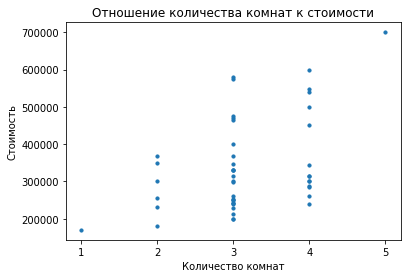

In [ ]:
# визуализация данных

# построение графика - отношение кол-ва комнат к стоимости
plt.scatter(rooms, cost, s=10)

# подписи графика
plt.title('Отношение количества комнат к стоимости')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')

# значения по оси x - комнат может быть от 1 до 5 включительно
plt.xticks([i for i in range(1, 6)])
plt.show()

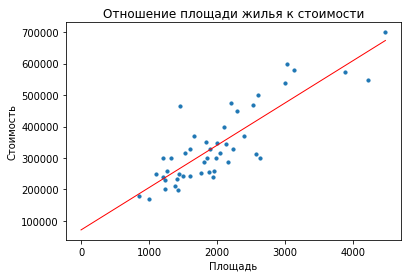

Ошибка модели: 1.9346e+11


In [ ]:
# линейная модель

# обучение модели
f1p, residuals, rank, sv, rcond = np.polyfit(square, cost, 1, full=True)
f1 = np.poly1d(f1p)
# linspace - линейное пространство 
# аргументы - start, stop
fx = np.linspace(0, max(square)) 

# визуализация модели
plt.scatter(square, cost, s=10)
plt.plot(fx, f1(fx), linewidth=1.0, color='r')
plt.title('Отношение площади жилья к стоимости')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.show()


print(f"Ошибка модели: {error(f1, square, cost):.5}")

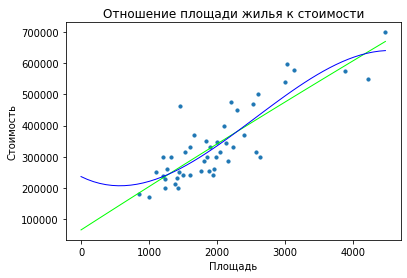

Ошибка модели (степень 2): 1.9342e+11
Ошибка модели (степень 3): 1.8844e+11


In [ ]:
# полиномиальная модель 2-3 степени

# Обучение моделей
f2p, residuals, rank, sv, rcond = np.polyfit(square, cost, 2, full=True)
f2 = np.poly1d(f2p)

f3p, residuals, rank, sv, rcond = np.polyfit(square, cost, 3, full=True)
f3 = np.poly1d(f3p)

# визуализация моделей
plt.scatter(square, cost, s=10)
plt.plot(fx, f2(fx), linewidth=1.0, color='lime')
plt.plot(fx, f3(fx), linewidth=1.0, color='blue')
plt.title('Отношение площади жилья к стоимости')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.show()

# вычисление ошибки
print(f"Ошибка модели (степень 2): {error(f2, square, cost):.5}")
print(f"Ошибка модели (степень 3): {error(f3, square, cost):.5}")

In [ ]:
# Линейная модель (с помощью scikit-learn) с 2 параметрами

# для того, чтобы использовать множественную регрессию, сделаем DataFrame из двух списков - площадей и кол-ва комнат
# для этого используем функцию zip, которая поможет создать список кортежей
data = list(zip(square, rooms))

# создаём DataFrame из полученных кортежей
X = pd.DataFrame(data, columns = ['square', 'rooms'])
Y = cost

# создаём объект LinearRegression, с помощью которого посчитаем регрессию
lin_reg = LinearRegression()
# для обучения модели следует использовать метод fit
# туда помещаем значения созданного DataFrame и цены
lin_reg.fit(X.values, Y)

# посчитаем ошибку данной модели
# функция, с помощью которой будет считаться ошибка - predict, которая предсказывает значения
# последующие аргументы - значения DataFrame и wtys
print(f"Ошибка данной модели: {error(lin_reg.predict, X.values, Y):.5}")

Ошибка данной модели: 1.9207e+11


Задание: Предскажите значения для двух объектах недвижимости с использованием этих трех моделей: 1650,3; 2200,4

In [ ]:
# Создадим DataFrame с тестовыми данными, для которых будут предсказываться значения цены
# аналогично с DataFrame выше
data = list(zip([1650, 2200], [3, 4]))
test = pd.DataFrame(data)

# результаты по линейной модели с учётом только размера
predicted = f1(test.values)
# нужные нам данные находятся по нулевому индексу в каждом из списков
print(f"Линейная модель с учётом только размера: {predicted[0][0]:.2f}, {predicted[1][0]:.2f}")

# результаты по модели второй степени
predicted = f2(test.values)
print(f"Модель 2 степени: {predicted[0][0]:.2f}, {predicted[1][0]:.2f}")

# результаты по модели третьей степени
predicted = f3(test.values)
print(f"Модель 3 степени: {predicted[0][0]:.2f}, {predicted[1][0]:.2f}")

# результаты по линейной модель, учитывающей размер и кол-во
predicted = lin_reg.predict(test.values)
print(f"Множественная регрессия: {predicted[0]:.2f}, {predicted[1]:.2f}")

Линейная модель с учётом только размера: 293237.22, 367226.13
Модель 2 степени: 293387.08, 368112.59
Модель 3 степени: 285422.83, 365824.75
Множественная регрессия: 293081.46, 360909.32


Вывод:

Наименьшая ошибка у модели третьей степени, так как обучение с большей степенью получилось более точным